In [ ]:
# training days: March 15 to current_day - 1
# upload files from 15th march to 29th march

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Paths
actual_path = '/content'
predicted_path = '/content/predicted'
os.makedirs(predicted_path, exist_ok=True)

# Dates to predict
prediction_days = ['2025-03-25', '2025-03-26', '2025-03-27', '2025-03-28', '2025-03-29']

In [ ]:
# --- Collect metrics for all days ---
metrics = {
  'date': [],
  'MAE': [],
  'RMSE': [],
  'MAPE': []
}


🔄 Predicting for: 2025-03-25
✅ MAE: 725.20
✅ RMSE: 770.17
✅ MAPE: 5.43%


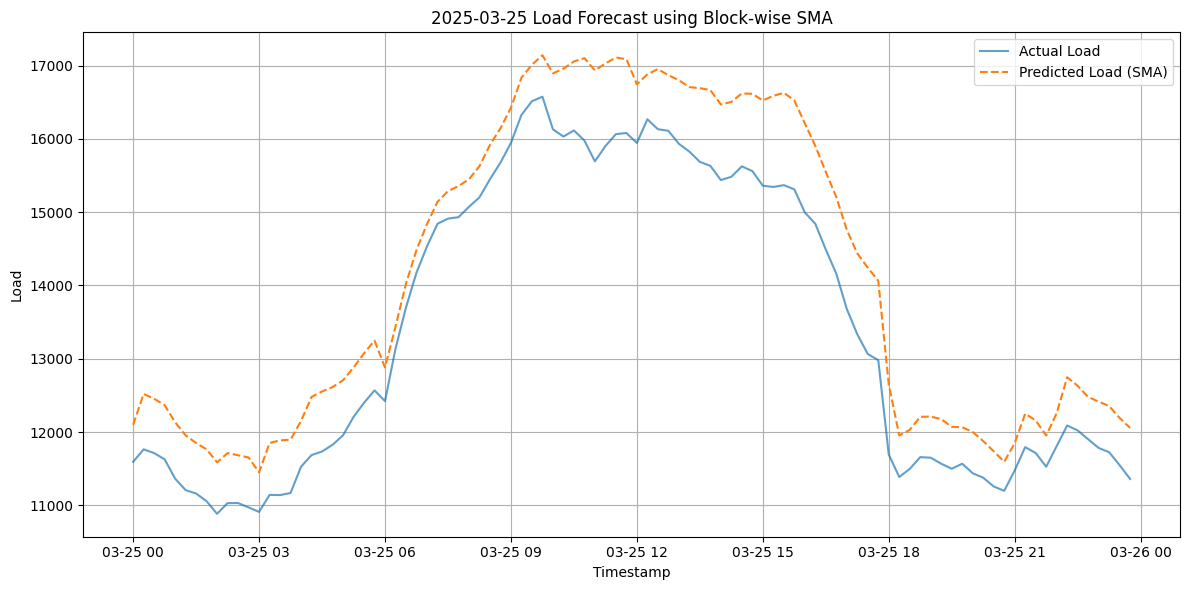


🔄 Predicting for: 2025-03-26
✅ MAE: 709.25
✅ RMSE: 778.26
✅ MAPE: 5.54%


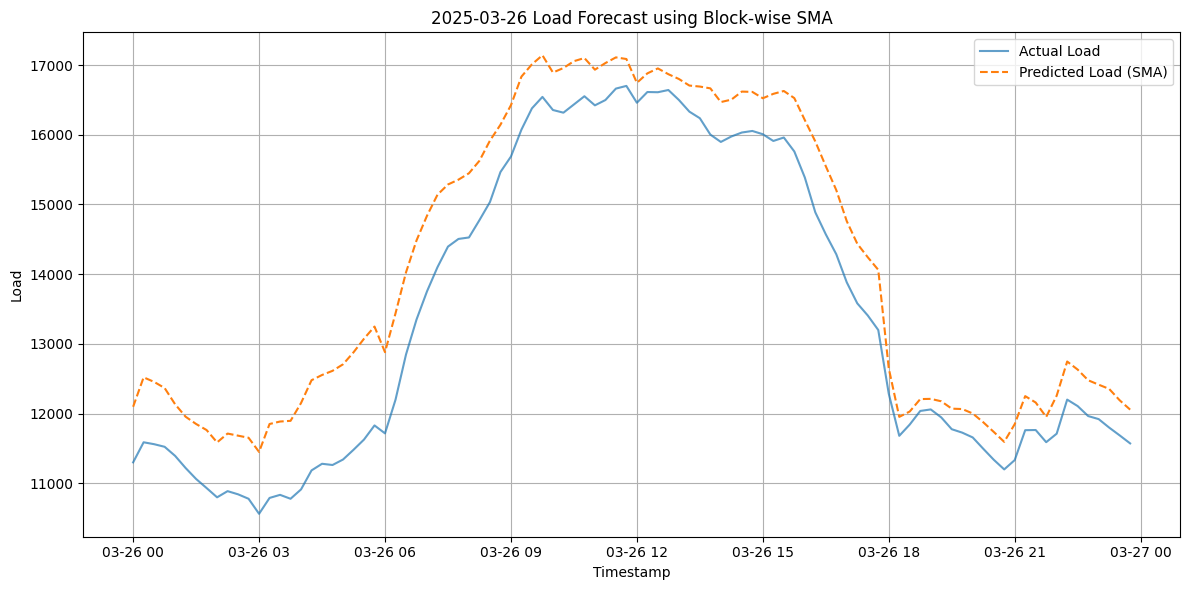


🔄 Predicting for: 2025-03-27
✅ MAE: 445.95
✅ RMSE: 492.45
✅ MAPE: 3.33%


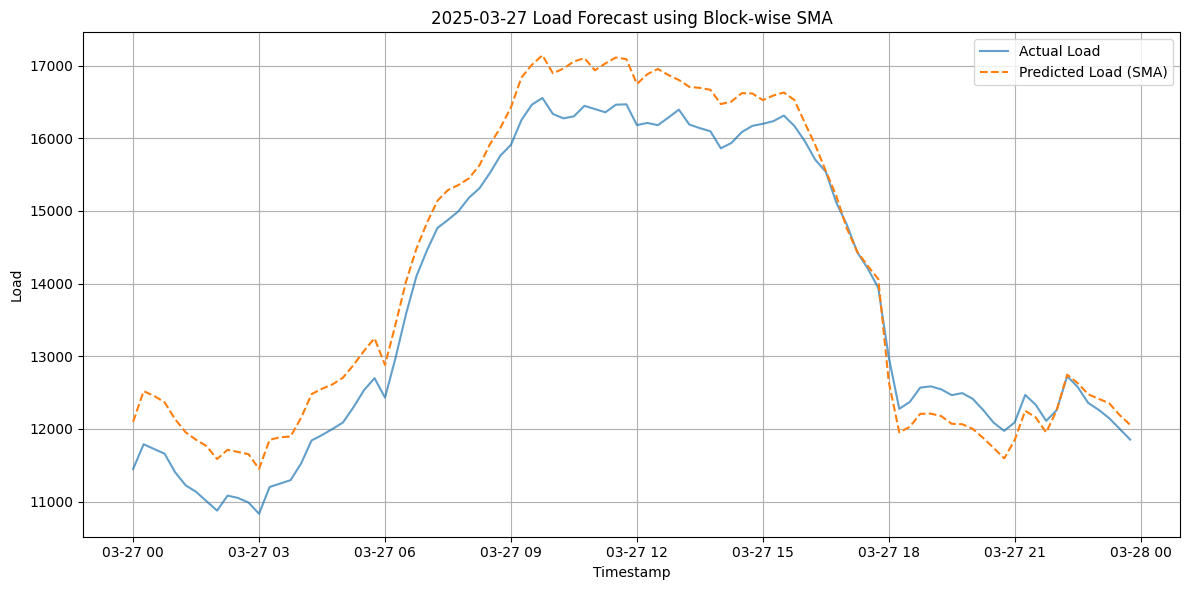


🔄 Predicting for: 2025-03-28
✅ MAE: 261.77
✅ RMSE: 297.71
✅ MAPE: 2.03%


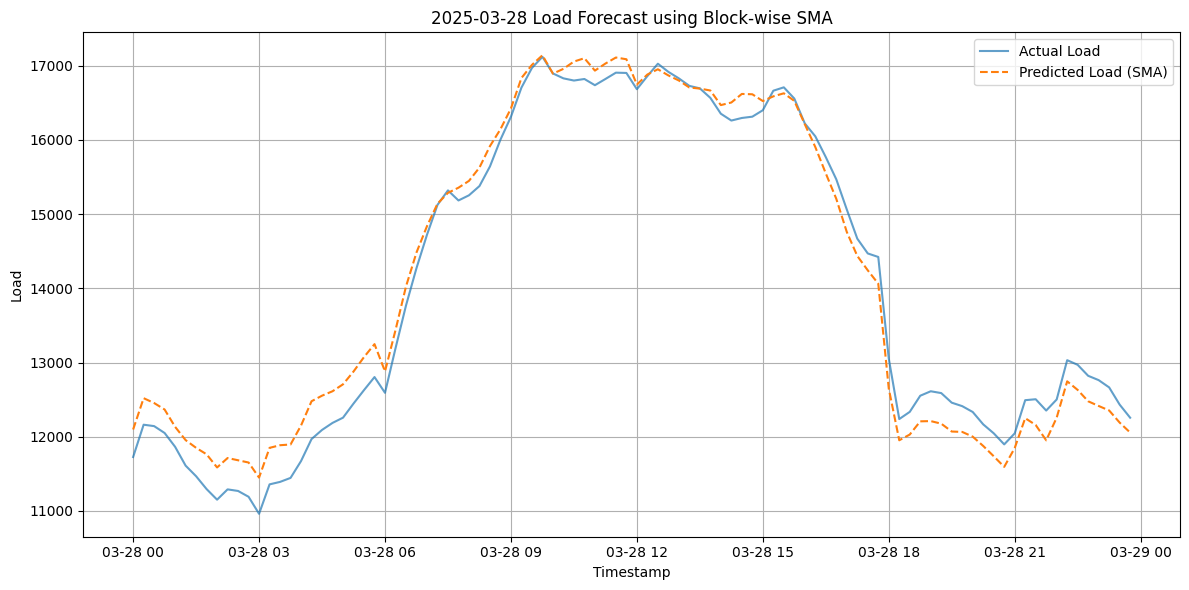


🔄 Predicting for: 2025-03-29
✅ MAE: 220.16
✅ RMSE: 335.41
✅ MAPE: 1.63%


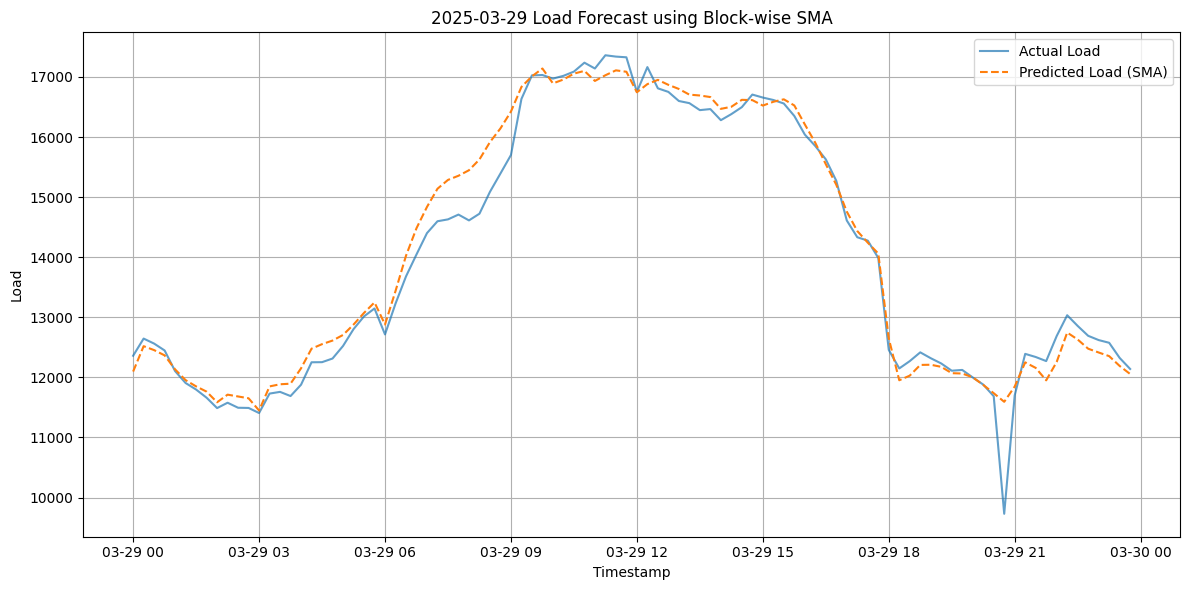

In [ ]:
# Loop through each prediction day
for i, day in enumerate(prediction_days):
    print(f"\n🔄 Predicting for: {day}")

    # Get training days: March 15 to current_day - 1
    start_train = pd.to_datetime("2025-03-15")
    current_day = pd.to_datetime(day)
    train_days = pd.date_range(start=start_train, end=current_day - pd.Timedelta(days=1)).strftime('%Y-%m-%d')

    train_dfs = []

    for train_day in train_days:
        file_path = os.path.join(actual_path if train_day <= '2025-03-24' else predicted_path, f"{train_day}.csv")
        df = pd.read_csv(file_path, parse_dates=['date_time'], index_col='date_time')
        df['time'] = df.index.time
        train_dfs.append(df)

    # Combine all training data
    train = pd.concat(train_dfs)
    train = train.sort_index()

    # Load actual test file (for metrics only)
    test_file = os.path.join(actual_path, f"{day}.csv")
    test = pd.read_csv(test_file, parse_dates=['date_time'], index_col='date_time')
    test = test.sort_index()
    test['time'] = test.index.time

    # Compute block-wise average
    blockwise_avg = train.groupby('time')['load'].mean()

    # Predict using SMA
    test['predicted_load'] = test['time'].map(blockwise_avg)

    # Save predicted values for next iteration
    predicted_df = pd.DataFrame({
        'date_time': test.index,
        'load': test['predicted_load']
    })
    predicted_df.to_csv(f"{predicted_path}/{day}.csv", index=False)

    # Evaluation
    mae = mean_absolute_error(test['load'], test['predicted_load'])
    rmse = np.sqrt(mean_squared_error(test['load'], test['predicted_load']))
    mape = (abs((test['load'] - test['predicted_load']) / test['load']).mean()) * 100

    print(f"✅ MAE: {mae:.2f}")
    print(f"✅ RMSE: {rmse:.2f}")
    print(f"✅ MAPE: {mape:.2f}%")

    # Move this inside your loop (right after you compute metrics)
    metrics['date'].append(day)
    metrics['MAE'].append(mae)
    metrics['RMSE'].append(rmse)
    metrics['MAPE'].append(mape)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(test.index, test['load'], label='Actual Load', alpha= 0.7)
    plt.plot(test.index, test['predicted_load'], label='Predicted Load (SMA)', linestyle='--')
    plt.xlabel('Timestamp')
    plt.ylabel('Load')
    plt.title(f'{day} Load Forecast using Block-wise SMA')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


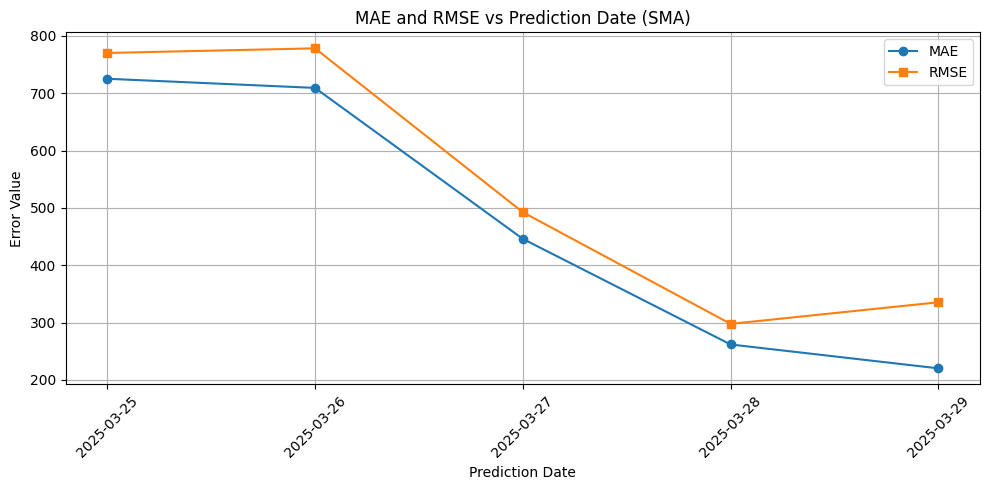

In [ ]:
# --- Plot MAE and RMSE together ---
plt.figure(figsize=(10, 5))
plt.plot(metrics['date'], metrics['MAE'], marker='o', label='MAE')
plt.plot(metrics['date'], metrics['RMSE'], marker='s', label='RMSE')
plt.title("MAE and RMSE vs Prediction Date (SMA)")
plt.xlabel("Prediction Date")
plt.ylabel("Error Value")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


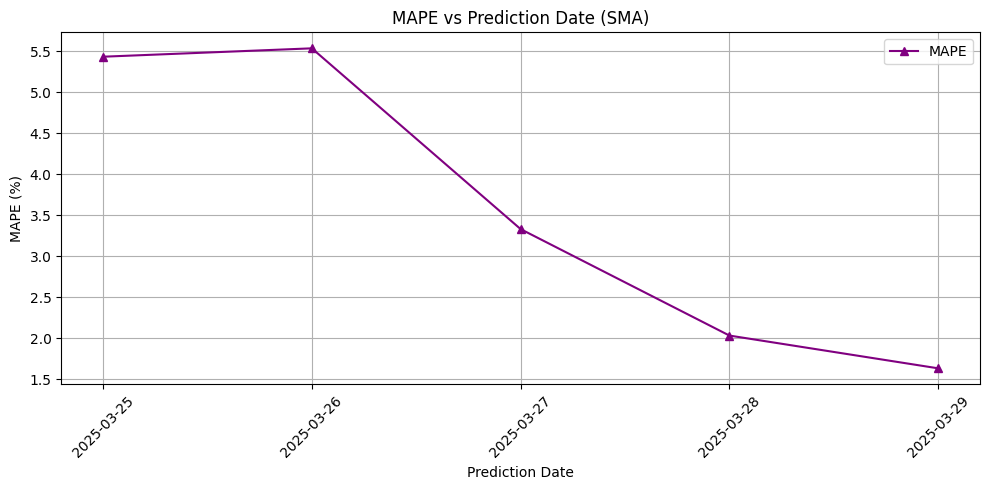

In [ ]:
# --- Plot MAPE separately ---
plt.figure(figsize=(10, 5))
plt.plot(metrics['date'], metrics['MAPE'], marker='^', color='purple', label='MAPE')
plt.title("MAPE vs Prediction Date (SMA)")
plt.xlabel("Prediction Date")
plt.ylabel("MAPE (%)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()